# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**:  
1) What is the age of the users, their gender?<br>
2) How long they use this service?<br>
3) Where is this service very active among users?<br>
4) Is this service available 24X7 ?<br>
             
            

> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

<b>I have given</b> // UNCOMMENT TO SEE OUTPUT  <b>in few lines, to see the output it can be uncommented.</b>

In [1]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime as dt # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.
    
import pandas as pd
import numpy as np
import math

In [2]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city)) 
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)
            
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = next(trip_reader)
    
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip) 
    
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

# The following code creates a list of Dictionary Data of cities

In [3]:
nyc = []
chicago = []
washington = []

def query_data_from_csv(filename):
    with open(filename , 'r') as f:
        reader = csv.DictReader(f)
        return list(reader)
    return None


nyc = query_data_from_csv(data_files[0])
chicago = query_data_from_csv(data_files[1])
washington = query_data_from_csv(data_files[2])    

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

## Cleaning Data

In [4]:
chicago[0] 

OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clark St & Wellington Ave'),
             ('to_station_id', '166'),
             ('to_station_name', 'Ashland Ave & Wrightwood Ave'),
             ('usertype', 'Subscriber'),
             ('gender', 'Male'),
             ('birthyear', '1990')])

In [5]:
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%m/%d/%Y %H:%M:%S')
    
def parse_date_chicago(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%m/%d/%Y %H:%M')
    
def parse_int(i):
    if i == '':
        return None
    else:
        return int(i)
    
def parse_float(i):
    if i == '':
        return None
    else:
        return float(i)
    

for data in nyc:
    data['tripduration'] = parse_int(data['tripduration'])
    data['starttime'] = parse_date(data['starttime'])
    data['stoptime'] = parse_date(data['stoptime'])
    data['start station id'] = parse_int(data['start station id'])
    data['start station latitude'] = parse_float(data['start station latitude'])
    data['start station longitude'] = parse_float(data['start station longitude'])
    data['end station id'] = parse_int(data['end station id'])
    data['end station latitude'] = parse_float(data['end station latitude'])
    data['end station longitude'] = parse_float(data['end station longitude'])
    data['birth year'] = parse_int(data['birth year'])

nyc[10]     

OrderedDict([('tripduration', 798),
             ('starttime', datetime.datetime(2016, 1, 1, 2, 2, 40)),
             ('stoptime', datetime.datetime(2016, 1, 1, 2, 15, 58)),
             ('start station id', 152),
             ('start station name', 'Warren St & Church St'),
             ('start station latitude', 40.71473993),
             ('start station longitude', -74.00910627),
             ('end station id', 410),
             ('end station name', 'Suffolk St & Stanton St'),
             ('end station latitude', 40.72066442),
             ('end station longitude', -73.98517977),
             ('bikeid', '24119'),
             ('usertype', 'Subscriber'),
             ('birth year', 1987),
             ('gender', '1')])

In [6]:
for data in chicago:
    data['trip_id'] = parse_int(data['trip_id'])
    data['starttime'] = parse_date_chicago(data['starttime'])
    data['stoptime'] = parse_date_chicago(data['stoptime'])
    data['tripduration'] = parse_int(data['tripduration'])
    data['from_station_id'] = parse_int(data['from_station_id'])
    data['to_station_id'] = parse_int(data['to_station_id'])
    data['birthyear'] = parse_int(data['birthyear'])
    
chicago[0]   

OrderedDict([('trip_id', 9080545),
             ('starttime', datetime.datetime(2016, 3, 31, 23, 30)),
             ('stoptime', datetime.datetime(2016, 3, 31, 23, 46)),
             ('bikeid', '2295'),
             ('tripduration', 926),
             ('from_station_id', 156),
             ('from_station_name', 'Clark St & Wellington Ave'),
             ('to_station_id', 166),
             ('to_station_name', 'Ashland Ave & Wrightwood Ave'),
             ('usertype', 'Subscriber'),
             ('gender', 'Male'),
             ('birthyear', 1990)])

In [7]:
for data in washington:
    data['Duration (ms)'] = parse_int(data['Duration (ms)'])
    data['Start date'] = parse_date_chicago(data['Start date'])
    data['End date'] = parse_date_chicago(data['End date'])
    data['Start station number'] = parse_int(data['Start station number'])
    data['End station number'] = parse_int(data['End station number'])

washington[0] 

OrderedDict([('Duration (ms)', 427387),
             ('Start date', datetime.datetime(2016, 3, 31, 22, 57)),
             ('End date', datetime.datetime(2016, 3, 31, 23, 4)),
             ('Start station number', 31602),
             ('Start station', 'Park Rd & Holmead Pl NW'),
             ('End station number', 31207),
             ('End station', 'Georgia Ave and Fairmont St NW'),
             ('Bike number', 'W20842'),
             ('Member Type', 'Registered')])

In [8]:
def convert_into_its_datatype( data , city):
    if city == 'NYC':
        #print(data)
        data['tripduration'] = parse_int(data['tripduration'])
        data['starttime'] = parse_date(data['starttime'])
        data['stoptime'] = parse_date(data['stoptime'])
        data['start station id'] = parse_int(data['start station id'])
        data['start station latitude'] = parse_float(data['start station latitude'])
        data['start station longitude'] = parse_float(data['start station longitude'])
        data['end station id'] = parse_int(data['end station id'])
        data['end station latitude'] = parse_float(data['end station latitude'])
        data['end station longitude'] = parse_float(data['end station longitude'])
        #data['birth year'] = parse_int(data['birth year'])
    elif city == 'Chicago':            
        #print(data)
        data['trip_id'] = parse_int(data['trip_id'])
        data['starttime'] = parse_date_chicago(data['starttime'])
        data['stoptime'] = parse_date_chicago(data['stoptime'])
        data['tripduration'] = parse_int(data['tripduration'])
        data['from_station_id'] = parse_int(data['from_station_id'])
        data['to_station_id'] = parse_int(data['to_station_id'])
        #data['birthyear'] = parse_int(data['birthyear'])
    elif city == 'Washington':
        #print(data)
        data['Duration (ms)'] = parse_int(data['Duration (ms)'])
        data['Start date'] = parse_date_chicago(data['Start date'])
        data['End date'] = parse_date_chicago(data['End date'])
        data['Start station number'] = parse_int(data['Start station number'])
        data['End station number'] = parse_int(data['End station number'])
        
    return data

In [9]:
def milli_to_minutes(milli_sec):
    '''
    This function takes in time as milli seconds and convert it into minutes and return in minutes
    '''
    minutes=(milli_sec/(1000*60))%60
    #minutes = int(minutes)
    return minutes

In [10]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    # YOUR CODE HERE
    datum = convert_into_its_datatype(datum , city)
    
    
    if city == 'NYC':
        duration = datum['tripduration'] / 60
    elif city == 'Chicago':    
        duration = datum['tripduration'] /60
        
    elif city == 'Washington':
        duration = milli_to_minutes( datum['Duration (ms)'] )
        
        
    #print(duration) //UNCOMMENT TO SEE OUTPUT
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}
for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [11]:
for city in example_trips:  
    pprint(example_trips[city]) 

OrderedDict([('tripduration', 839),
             ('starttime', datetime.datetime(2016, 1, 1, 0, 9, 55)),
             ('stoptime', datetime.datetime(2016, 1, 1, 0, 23, 54)),
             ('start station id', 532),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', 40.710451),
             ('start station longitude', -73.960876),
             ('end station id', 401),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', 40.72019576),
             ('end station longitude', -73.98997825),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])
OrderedDict([('trip_id', 9080545),
             ('starttime', datetime.datetime(2016, 3, 31, 23, 30)),
             ('stoptime', datetime.datetime(2016, 3, 31, 23, 46)),
             ('bikeid', '2295'),
             ('tripduration', 926),
             ('from_station_id', 156),
   

## Helper functions for time_of_trip() function

In [12]:
def get_month(datum , city):
    if city == 'NYC':
        month= datum['starttime'].date().month
    elif city == 'Chicago':
        month = datum['starttime'].date().month
    elif city == 'Washington':
        month = datum['Start date'].date().month
    return month    

#print(get_month(example_trips['Washington'] , 'Washington')) //UNCOMMENT TO SEE OUTPUT

def get_hour( datum, city ):
    if city == 'NYC':
        hour = datum['starttime'].time().hour
    elif city == 'Chicago':
        hour = datum['starttime'].time().hour
    elif city == 'Washington':
        hour = datum['Start date'].time().hour
    return hour

#print(get_hour(example_trips['Washington'] , 'Washington')) //UNCOMMENT TO SEE OUTPUT

def get_weekDay( datum , city):
    if city == 'NYC':
        week_day = datum['starttime'].strftime('%A')
    elif city == 'Chicago':
        week_day = datum['starttime'].strftime('%A')
    elif city == 'Washington':
        week_day = datum['Start date'].strftime('%A')
    return week_day

#print(get_weekDay(example_trips['Washington'] , 'Washington'))  //UNCOMMENT TO SEE OUTPUT

In [13]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    # YOUR CODE HERE
    month = get_month(datum, city)
    hour = get_hour(datum, city)
    day_of_week = get_weekDay(datum, city)
    
    #print(month)
    #print(hour)
    #print(day_of_week)
    
    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [14]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    # YOUR CODE HERE
    if city == 'NYC':
        user_type = datum['usertype']
    elif city == 'Chicago':
        user_type = datum['usertype']
    elif city == 'Washington':
        user_type = datum['Member Type']
        if user_type == 'Registered':
            user_type = 'Subscriber'
        else:
            user_type = 'Customer'
    #print(user_type)   //UNCOMMENT TO SEE OUTPUT
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [15]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            new_point['duration'] = duration_in_mins( row , city )
            new_point['month'] , new_point['hour'] , new_point['day_of_week'] = time_of_trip( row , city )
            new_point['user_type'] = type_of_user( row , city )      

            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point)
            
            

In [16]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    #print_first_point(filenames['out_file'])

> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**:
<br>
NYC has the highest number of trips.<br>
NYC has the highest propoertion of trips made by subscribers.<br>
Chicago has the highest proportion of trips made by short-term customers<br>

In [17]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)

In [18]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

#data_file = './examples/BayArea-Y3-Summary.csv'
#print(number_of_trips(data_file))

## Answer for 4 b ##

## Loading file names ##
condensed_file_nyc_loc = './data/NYC-2016-Summary.csv'
condensed_file_chicago_loc = './data/Chicago-2016-Summary.csv'
condensed_file_washington_loc = './data/Washington-2016-Summary.csv'

# Loading the number of Subscribers, Customers, Total num. of trips of each city
#print("NYC:")  
nyc_subscriber , nyc_customer , nyc_total_rides = number_of_trips(condensed_file_nyc_loc)
#print(number_of_trips(condensed_file_nyc_loc))

#print("Chicago:")  
chicago_subscriber , chicago_customer , chicaago_total_rides = number_of_trips(condensed_file_chicago_loc)
#print(number_of_trips(condensed_file_chicago_loc))

#print("Washington:")  
washington_subscriber , washington_customer , washington_total_rides = number_of_trips(condensed_file_washington_loc)
#print(number_of_trips(condensed_file_washington_loc),'\n')

# Creating a Pandas Dataframe for the above data of number of Subscribers, Customers, Total num. of trips of each city
df_no_of_rides = pd.DataFrame(
data = [ [nyc_subscriber , nyc_customer , nyc_total_rides],
         [chicago_subscriber , chicago_customer , chicaago_total_rides],
         [washington_subscriber, washington_customer, washington_total_rides]],
index = ['NYC','Chicago','Washington'],
columns = ['subscriber','customer','total_rides'])

def get_proportion( x , tot):
    '''
    This function takes single column( as x ) and total number of trips( as tot ) as parameters, and find the ratio,
    compare it by loading it in Numpy Array.
    '''
    nyc = x['NYC'] / tot['NYC']
    chicago = x['Chicago'] / tot['Chicago']
    washington = x['Washington'] / tot['Washington']
    
    proportion_list = np.array([nyc,chicago,washington])
    if proportion_list.argmax() == 0:
        return 'NYC'
    elif proportion_list.argmax() == 1:
        return 'Chicago'
    elif proportion_list.argmax() == 2:
        return 'Washington'
    return proportion_list.max()

## Printing the entire Dataframe



print(df_no_of_rides)   

print("\nMAX SUBSCRIBER(proportion):")  
print(get_proportion ( df_no_of_rides['subscriber'] , df_no_of_rides['total_rides']))  
print("MAX CUSTOMER(proportion:")   
print(get_proportion ( df_no_of_rides['customer'] , df_no_of_rides['total_rides']))   
print("MAX TOTAL RIDES:")  
print(df_no_of_rides['total_rides'].argmax())  








            subscriber  customer  total_rides
NYC             245896     30902       276798
Chicago          54982     17149        72131
Washington       51753     14573        66326

MAX SUBSCRIBER(proportion):
NYC
MAX CUSTOMER(proportion:
Chicago
MAX TOTAL RIDES:
NYC


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**:

NYC:
Average Duration: 15.82 Percent: 7.31 %

Chicago:
Average Duration: 16.57 Percent: 8.34 %

Washington:
Average Duration: 14.22 Percent: 7.99 %

In [22]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##


def convert_datatypes_summary_data(data_list):
    '''
    This helper function takes in the list of data and coverts str to int/float and return the converted list
    '''
    for data in data_list:
        data['duration'] = parse_float(data['duration'])
        data['month'] = parse_int(data['month'])
        data['hour'] = parse_int(data['hour'])
    return data_list

def calculate_duration_and_greater_than_30mins(data_list):
    tot_duration = 0
    num_of_trips = 0
    duration_greater_than_30 = 0
    
    for data in data_list:
        tot_duration = data['duration'] + tot_duration
        num_of_trips = num_of_trips + 1
        if data['duration'] >= 30:
            duration_greater_than_30 = duration_greater_than_30 + 1

    percent = ( duration_greater_than_30 * 100 ) / num_of_trips           
    avg_duration = tot_duration / num_of_trips
    
    #print("Total Duration: ",tot_duration)
    #print("Num of trips: ",num_of_trips)
    #print('Greater than 30: ', duration_greater_than_30)
    #print("Percent: ",percent)
    
    return (avg_duration , percent)

summary_nyc = []
summary_chicago = []
summary_washington = []
bay = []

summary_nyc = query_data_from_csv(condensed_file_nyc_loc)
summary_chicago = query_data_from_csv(condensed_file_chicago_loc)
summary_washington = query_data_from_csv(condensed_file_washington_loc)
bay = query_data_from_csv('./examples/BayArea-Y3-Summary.csv')
        


In [23]:
summary_nyc = convert_datatypes_summary_data(summary_nyc)
summary_chicago = convert_datatypes_summary_data(summary_chicago)
summary_washington = convert_datatypes_summary_data(summary_washington)
bay = convert_datatypes_summary_data(bay)

In [26]:
## Printing the Average Duration and percentage of trips having duration grater than 30 mins ##



print("NYC:")
x , y = calculate_duration_and_greater_than_30mins(summary_nyc)
print('Average Duration:',(math.ceil(x*100)/100) ,'Percent:',(math.ceil(y*100)/100), '%\n' )

print("Chicago:")
x , y = calculate_duration_and_greater_than_30mins(summary_chicago)
print('Average Duration:',(math.ceil(x*100)/100) ,'Percent:',(math.ceil(y*100)/100), '%\n' )

print("Washington:")
x , y = calculate_duration_and_greater_than_30mins(summary_washington)
print('Average Duration:',(math.ceil(x*100)/100) ,'Percent:',(math.ceil(y*100)/100), '%\n' )



NYC:
Average Duration: 15.82 Percent: 7.31 %

Chicago:
Average Duration: 16.57 Percent: 8.34 %

Washington:
Average Duration: 14.22 Percent: 7.99 %



**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**:

<b>NYC:</b>

Average Subscriber trip duration: 13.69 mins

Average Customer trip duration: 32.78 mins

In [27]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##

## Here I am going to calculate the average duration for Subscriber and Customer of NYC
def calculate_avg_duration_for_subscriber_and_customer(data_list):
    subs = subs_num = cust = cust_num = tot = 0
    
    for data in data_list:
        if data['user_type'] == 'Subscriber':
            subs = data['duration'] + subs
            subs_num = subs_num + 1
        else:
            cust = data['duration'] + cust
            cust_num = cust_num + 1
    return (subs/subs_num , cust/cust_num)

nyc_avg_duration_subs , nyc_avg_duration_cust = calculate_avg_duration_for_subscriber_and_customer(summary_nyc)
print("NYC:\nAverage Subscriber trip duration:",math.ceil(nyc_avg_duration_subs*100)/100,'mins') 
print('\nAverage Customer trip duration:',math.ceil(nyc_avg_duration_cust*100)/100,'mins')  

NYC:
Average Subscriber trip duration: 13.69 mins

Average Customer trip duration: 32.78 mins


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

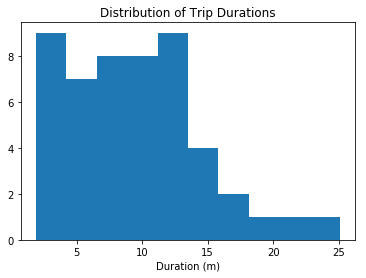

In [28]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data )
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

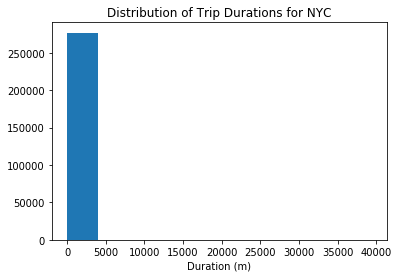

In [29]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##
nyc_time = []
for data in summary_nyc:
    nyc_time.append(data['duration'])

plt.hist(nyc_time, range=[min(nyc_time), max(nyc_time)]  )
plt.title('Distribution of Trip Durations for NYC')
plt.xlabel('Duration (m)')
plt.show()

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**:

We could see the peak for subscribers in 5 to 10 minutes and for the customers in 20 to 25 minutes.<br>

From the graph of subscribers we could say that they use this service only for shorter duration, may be regularly they might be using for their day-to-day activites, may for nearby office, school etc.<br>

From the graph of Customers we could say that they use this service for longer duration than the subscribed users.<br>

Although it seems to be that customers are the large users, but actually subscribers are so, we could say that from the markings in Y-axis. Although Subscribers use the service for shorter duration they are in maximum number.

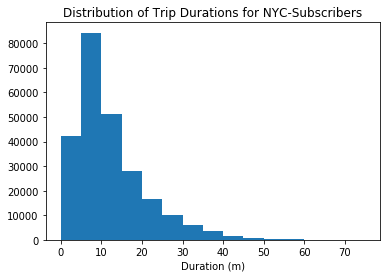

In [34]:
## Use this and additional cells to answer Question 5. ##
nyc_time_subs = []
for data in summary_nyc:
    if data['user_type'] == 'Subscriber':
        if data['duration'] < 75:
            nyc_time_subs.append(data['duration'])
            

plt.hist(nyc_time_subs, range=[0 , 75] , bins = 15)
plt.title('Distribution of Trip Durations for NYC-Subscribers')
plt.xlabel('Duration (m)')
plt.show()   

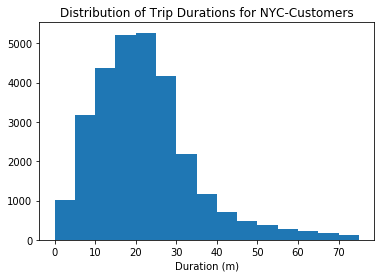

In [35]:

nyc_time_cust = []
for data in summary_nyc:
    if data['user_type'] == 'Customer':
        if data['duration'] < 75:
            nyc_time_cust.append(data['duration'])
            

plt.hist(nyc_time_cust, range=[0 , 75] , bins = 15)
plt.title('Distribution of Trip Durations for NYC-Customers')
plt.xlabel('Duration (m)')
plt.show()   

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: <br>

<b>For viewing this answer clearly please look this cell in editing mode, because I have included table like content</b>


<b>Number of week-days, week-end users</b><br>
                weekdays user  weekend users<br>
NYC                212093          64705<br>
Chicago             52550          19581<br>
Washington          49199          17127<br>
<br>
<b>For Week Days users</b><br>
               Subscriber(%)  Customer(%)<br>
NYC             92.089791     7.910209<br>
Chicago         83.604186    16.395814<br>
Washington      83.156162    16.843838<br>
<br>
<b>For Week End users</b><br>
            Subscriber(%)  Customer(%)<br>
NYC             78.170157    21.829843<br>
Chicago         56.422042    43.577958<br>
Washington      63.297717    36.702283<br>
<br>
We could see highest WeekDay Subscriber Riders in  NYC and WeekDay Customer Riders in  Washington.<br>
We could see highest WeekEnd Subscriber Riders in  NYC and WeekEnd Customer Riders in  Chicago.<br>


<img src='Untitled Folder/week_days_subs.png'> </img>
<img src='Untitled Folder/week_days_cust.png'> </img>
<img src='Untitled Folder/week_end_subs.png'> </img>
<img src='Untitled Folder/week_end_cust.png'> </img>

<i>You could find the graphs in the below cells also</i>

# Question
* How many weekdays and weekend riders are in each city? In which how many percent are Subscribers and how many percent are Customers?
* In each city who is the highest number of weekdays user and the highest number of weekend users?
* Which city has highest number of Subscriber and Customer in weekdays and same in weekend?
* Plot the graph for weekdays and weekend users of anyone city.

In [36]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above. 




# HELPER FUNCTIONS #

## Grouping weekdays and weekend riders
def group_weekdays_and_weekend_riders(data_list):
    '''
    This helper function takes the list of data containing condensed data of each city, loop over it and seperate
    its week-days riders and week-end riders and returns the lists of week-days riders and week-end riders.
    '''
    weekdays_riders = []
    weekend_riders = []
    for data in data_list:
        if data['day_of_week'] == 'Saturday' or data['day_of_week']  == 'Sunday':
            weekend_riders.append(data)
        else:
            weekdays_riders.append(data)
    return (weekdays_riders,weekend_riders)

## Find percent of Subscribers and Customers
def find_percent_of_subscribers_and_customers(data_list):
    '''
    This helper function takes the lists of data and loops over it to check the percent of Subscribers and Customers in it.
    '''
    subs = 0
    cust = 0
    tot = 0
    for data in data_list:
        tot = tot + 1
        if data['user_type'] == 'Subscriber':
            subs = subs + 1
        else:
            cust = cust + 1
    return ((subs/tot)*100 , (cust/tot)*100)
    
## Find the highest percent of Subscribers and Customers
def find_the_highest_percent_Subscriber_and_Customer(df):
    '''
    This helper function takes in a DataFrame as a parameter and returns the argument of each column. Here Subscriber(%)
    and Customer(%).
    '''
    return (df['Subscriber(%)'].argmax() , df['Customer(%)'].argmax())

## Function to convert number denoted month into string denoted month
def get_month(i):
    if i == 1:
        return 'Jan'
    elif i == 2:
        return 'Feb'
    elif i == 3:
        return 'Mar'
    elif i == 4:
        return 'Apr'
    elif i == 5:
        return 'May'
    elif i == 6:
        return 'Jun'
    elif i == 7:
        return 'Jul'
    elif i == 8:
        return 'Aug'
    elif i == 9:
        return 'Sep'
    elif i == 10:
        return 'Oct'
    elif i == 11:
        return 'Nov'
    elif i == 12:
        return 'Dec'
    return 'non'
    
## Find monthly active Subscribers and Customers    
def find_monthly_active_users(data_list):
    '''
    This helper function loops over the list of data and finds the number of users each month for Subscribers
    and Customers seperately and return the list subs and cust
    '''
    subs = {}
    cust = {}
    for data in data_list:
        index = get_month(data['month'])
        if data['user_type'] == 'Subscriber':    
            if subs.get(index):
                subs[index] = subs[index] + 1
            else:
                subs[index] = 1
        else:
            if cust.get(index):
                cust[index] = cust[index] + 1
            else:
                cust[index] = 1
    return (subs,cust)



In [37]:
##  Here we call the group_weekdays_and_weekend_riders(data_list) function and load number of week-days riders 
#     and week-end riders for each city into respective variables.
nyc_weekdays_riders , nyc_weekend_riders = group_weekdays_and_weekend_riders(summary_nyc)
chicago_weekdays_riders , chicago_weekend_riders = group_weekdays_and_weekend_riders(summary_chicago)
washington_weekdays_riders , washington_weekend_riders = group_weekdays_and_weekend_riders(summary_washington)



## Here we load the above data into DataFrame and print it for simplicity.
df_number_of_weekdays_weekend_users = pd.DataFrame(
data = [ [len(nyc_weekdays_riders) , len(nyc_weekend_riders)],
         [len(chicago_weekdays_riders) , len(chicago_weekend_riders)],
         [len(washington_weekdays_riders), len(washington_weekend_riders)]],
index = ['NYC','Chicago','Washington'],
columns = ['weekdays user','weekend users'])

pprint(df_number_of_weekdays_weekend_users) 

            weekdays user  weekend users
NYC                212093          64705
Chicago             52550          19581
Washington          49199          17127


In [38]:
##  Here we call the function find_percent_of_subscribers_and_customers(data_list) and 
#   load percentage of Subscribers and Customers for week-days riders for each city into respective variables.    
nyc_weekdays_riders_subscribers , nyc_weekdays_riders_customers = find_percent_of_subscribers_and_customers(nyc_weekdays_riders)
chicago_weekdays_riders_subscribers , chicago_weekdays_riders_customers = find_percent_of_subscribers_and_customers(chicago_weekdays_riders)
washington_weekdays_riders_subscribers , washington_weekdays_riders_customers = find_percent_of_subscribers_and_customers(washington_weekdays_riders)


##  Here we call the function find_percent_of_subscribers_and_customers(data_list) and 
#   load percentage of Subscribers and Customers for week-end riders for each city into respective variables.
nyc_weekend_riders_subscribers , nyc_weekend_riders_customers = find_percent_of_subscribers_and_customers(nyc_weekend_riders)
chicago_weekend_riders_subscribers , chicago_weekend_riders_customers = find_percent_of_subscribers_and_customers(chicago_weekend_riders)
washington_weekend_riders_subscribers , washington_weekend_riders_customers = find_percent_of_subscribers_and_customers(washington_weekend_riders)


In [39]:
## printing weekday riders percentage of Subscriberes and Customers

print('\nWeekDay Riders:')   

df_number_of_weekdays_users = pd.DataFrame(
data = [ [ nyc_weekdays_riders_subscribers , nyc_weekdays_riders_customers],
         [ chicago_weekdays_riders_subscribers , chicago_weekdays_riders_customers ],
         [washington_weekdays_riders_subscribers , washington_weekdays_riders_customers]],
index = ['NYC','Chicago','Washington'],
columns = ['Subscriber(%)','Customer(%)'])

pprint(df_number_of_weekdays_users) 


WeekDay Riders:
            Subscriber(%)  Customer(%)
NYC             92.089791     7.910209
Chicago         83.604186    16.395814
Washington      83.156162    16.843838


In [40]:
## printing weekend riders percentage of Subscriberes and Customers

print('\nWeekEnd Riders:')  

df_number_of_weekend_users = pd.DataFrame(
data = [ [ nyc_weekend_riders_subscribers , nyc_weekend_riders_customers],
         [ chicago_weekend_riders_subscribers , chicago_weekend_riders_customers ],
         [washington_weekend_riders_subscribers , washington_weekend_riders_customers]],
index = ['NYC','Chicago','Washington'],
columns = ['Subscriber(%)','Customer(%)'])

pprint(df_number_of_weekend_users)  


WeekEnd Riders:
            Subscriber(%)  Customer(%)
NYC             78.170157    21.829843
Chicago         56.422042    43.577958
Washington      63.297717    36.702283


In [41]:
## Here we find which city has the highest percentage of Subscriber and Customer by calling the function
# find_the_highest_percent_Subscriber_and_Customer()

subs,cust = find_the_highest_percent_Subscriber_and_Customer(df_number_of_weekdays_users)
weekday_riders_highest_percent_Subs_And_Cust = [subs,cust]

subs,cust = find_the_highest_percent_Subscriber_and_Customer(df_number_of_weekend_users)
weekend_riders_highest_percent_Subs_And_Cust = [subs,cust]
print('We could see highest WeekDay Subscriber Riders in ',weekday_riders_highest_percent_Subs_And_Cust[0],
     'and WeekDay Customer Riders in ',weekday_riders_highest_percent_Subs_And_Cust[1])

print('We could see highest WeekEnd Subscriber Riders in ',weekend_riders_highest_percent_Subs_And_Cust[0],
     'and WeekEnd Customer Riders in ',weekend_riders_highest_percent_Subs_And_Cust[1])

We could see highest WeekDay Subscriber Riders in  NYC and WeekDay Customer Riders in  Washington
We could see highest WeekEnd Subscriber Riders in  NYC and WeekEnd Customer Riders in  Chicago


In [42]:

## Here we call the function find_monthly_active_users(data_list) to 
#     load the number of active users in weekdays-Subscribers
monthy_active_riders_weekdays_subs_nyc , monthy_active_riders_weekdays_cust_nyc = find_monthly_active_users(nyc_weekdays_riders)
monthy_active_riders_weekdays_subs_chicago , monthy_active_riders_weekdays_cust_chicago = find_monthly_active_users(chicago_weekdays_riders)
monthy_active_riders_weekdays_subs_washington , monthy_active_riders_weekdays_cust_washington = find_monthly_active_users(washington_weekdays_riders)


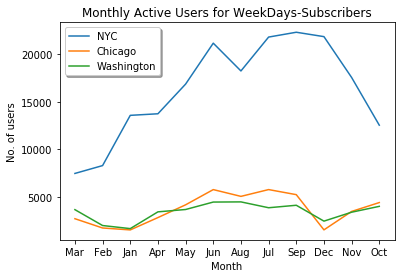

In [43]:
## Plotting for Weekdays-Subscribers
plt.plot(range(len(monthy_active_riders_weekdays_subs_nyc)), 
            list(monthy_active_riders_weekdays_subs_nyc.values()))
plt.xticks(range(len(monthy_active_riders_weekdays_subs_nyc)), 
            list(monthy_active_riders_weekdays_subs_nyc.keys()))

plt.plot(range(len(monthy_active_riders_weekdays_subs_chicago)),
             list(monthy_active_riders_weekdays_subs_chicago.values()))
plt.xticks(range(len(monthy_active_riders_weekdays_subs_chicago)),
            list(monthy_active_riders_weekdays_subs_chicago.keys()))


plt.plot(range(len(monthy_active_riders_weekdays_subs_washington)),
             list(monthy_active_riders_weekdays_subs_washington.values()))
plt.xticks(range(len(monthy_active_riders_weekdays_subs_washington)),
             list(monthy_active_riders_weekdays_subs_washington.keys()))


plt.legend(('NYC', 'Chicago', 'Washington'),
           loc='upper left', shadow=True)

plt.title('Monthly Active Users for WeekDays-Subscribers')
plt.xlabel('Month')
plt.ylabel('No. of users')
plt.show()

 

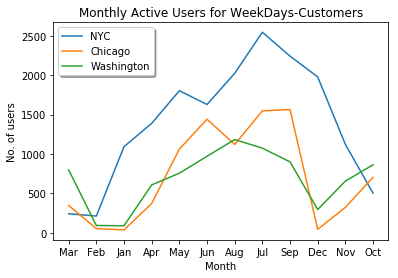

In [44]:
## Plotting for Weekdays-Customers

plt.plot(range(len(monthy_active_riders_weekdays_cust_nyc)), 
            list(monthy_active_riders_weekdays_cust_nyc.values()))
plt.xticks(range(len(monthy_active_riders_weekdays_cust_nyc)), 
            list(monthy_active_riders_weekdays_cust_nyc.keys()))

plt.plot(range(len(monthy_active_riders_weekdays_cust_chicago)),
             list(monthy_active_riders_weekdays_cust_chicago.values()))
plt.xticks(range(len(monthy_active_riders_weekdays_cust_chicago)),
            list(monthy_active_riders_weekdays_cust_chicago.keys()))


plt.plot(range(len(monthy_active_riders_weekdays_cust_washington)),
             list(monthy_active_riders_weekdays_cust_washington.values()))
plt.xticks(range(len(monthy_active_riders_weekdays_cust_washington)),
             list(monthy_active_riders_weekdays_cust_washington.keys()))


plt.legend(('NYC', 'Chicago', 'Washington'),
           loc='upper left', shadow=True)

plt.title('Monthly Active Users for WeekDays-Customers')
plt.xlabel('Month')
plt.ylabel('No. of users')
plt.show()

In [45]:
## Here we call the function find_monthly_active_users(data_list) to load the number of active users in weekend-Subscribers
monthy_active_riders_weekEnd_subs_nyc , monthy_active_riders_weekEnd_cust_nyc = find_monthly_active_users(nyc_weekend_riders)
monthy_active_riders_weekEnd_subs_chicago , monthy_active_riders_weekEnd_cust_chicago = find_monthly_active_users(chicago_weekend_riders)
monthy_active_riders_weekEnd_subs_washington , monthy_active_riders_weekEnd_cust_washington = find_monthly_active_users(washington_weekend_riders)


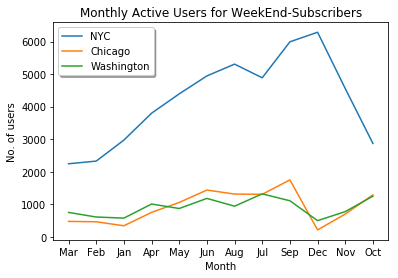

In [46]:
## Plotting for WeekEnd-Subscribers
plt.plot(range(len(monthy_active_riders_weekEnd_subs_nyc)), 
            list(monthy_active_riders_weekEnd_subs_nyc.values()))
plt.xticks(range(len(monthy_active_riders_weekEnd_subs_nyc)), 
            list(monthy_active_riders_weekEnd_subs_nyc.keys()))

plt.plot(range(len(monthy_active_riders_weekEnd_subs_chicago)),
             list(monthy_active_riders_weekEnd_subs_chicago.values()))
plt.xticks(range(len(monthy_active_riders_weekEnd_subs_chicago)),
            list(monthy_active_riders_weekEnd_subs_chicago.keys()))


plt.plot(range(len(monthy_active_riders_weekEnd_subs_washington)),
             list(monthy_active_riders_weekEnd_subs_washington.values()))
plt.xticks(range(len(monthy_active_riders_weekEnd_subs_washington)),
             list(monthy_active_riders_weekEnd_subs_washington.keys()))


plt.legend(('NYC', 'Chicago', 'Washington'),
           loc='upper left', shadow=True)

plt.title('Monthly Active Users for WeekEnd-Subscribers')
plt.xlabel('Month')
plt.ylabel('No. of users')
plt.show()



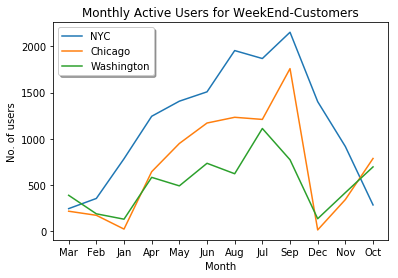

In [47]:
## Plotting for Weekend-Customers

plt.plot(range(len(monthy_active_riders_weekEnd_cust_nyc)), 
            list(monthy_active_riders_weekEnd_cust_nyc.values()))
plt.xticks(range(len(monthy_active_riders_weekEnd_cust_nyc)), 
            list(monthy_active_riders_weekEnd_cust_nyc.keys()))

plt.plot(range(len(monthy_active_riders_weekEnd_cust_chicago)),
             list(monthy_active_riders_weekEnd_cust_chicago.values()))
plt.xticks(range(len(monthy_active_riders_weekEnd_cust_chicago)),
            list(monthy_active_riders_weekEnd_cust_chicago.keys()))


plt.plot(range(len(monthy_active_riders_weekEnd_cust_washington)),
             list(monthy_active_riders_weekEnd_cust_washington.values()))
plt.xticks(range(len(monthy_active_riders_weekEnd_cust_washington)),
             list(monthy_active_riders_weekEnd_cust_washington.keys()))


plt.legend(('NYC', 'Chicago', 'Washington'),
           loc='upper left', shadow=True)

plt.title('Monthly Active Users for WeekEnd-Customers')
plt.xlabel('Month')
plt.ylabel('No. of users')
plt.show()

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: 

I would like to take the topic **Bio Medical Compounds data**. We can collect the datas of successful medicines. We can process the type of medicine and its compounds, try to sort out compound characteristics and store that data to find the possible compounds for any new drugs. This type of data analysis makes the work of finding out possible compounds for any new drugs easy for the chemists. This also provides any other possibility which is not predictable by us.

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

> If you are working on this project via the Project Notebook page in the classroom, you can also submit this project directly from the workspace. **Before you do that**, you should save an HTML copy of the completed project to the workspace by running the code cell below. If it worked correctly, the output code should be a 0, and if you click on the jupyter icon in the upper left, you should see your .html document in the workspace directory. Alternatively, you can download the .html copy of your report following the steps in the previous paragraph, then _upload_ the report to the directory (by clicking the jupyter icon).

> Either way, once you've gotten the .html report in your workspace, you can complete your submission by clicking on the "Submit Project" button to the lower-right hand side of the workspace.

In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0